Cho dữ liệu **penbased-5an-nn.csv **  
- **Yêu cầu 1**: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán thích hợp để thực hiện việc xác định một mẫu là loại nào (trong các loại 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) dựa trên các thông tin được cung cấp.   
    1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc và được chuẩn hóa, với tỷ lệ dữ liệu test là 0.3   
    2. Áp dụng thuật toán thích hợp để xây dựng model. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?   
    3. Đánh giá model dựa trên train/test.  
    4. Trực quan hóa kết quả (nếu có). Đưa ra một số nhận xét dựa trên kết quả.  
- **Yêu cầu 2**: Hãy **áp dụng thuật toán PCA và thuật toán đã chọn** ở Yêu cầu 1 để thực hiện việc xác định một mẫu là loại nào (trong các loại 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) dựa trên các thông tin được cung cấp.  
**Nhận xét kết quả giữa việc có áp dụng PCA và không áp dụng PCA.** 

 **----------------------------------------------------  DATA OVERVIEW  ----------------------------------------------------------**

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
import pandas as pd
data = pd.read_csv('du lieu cung cap/penbased-5an-nn.csv', header = None)

In [44]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 10992
Number of columns: 17


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
0     10992 non-null int64
1     10992 non-null int64
2     10992 non-null int64
3     10992 non-null int64
4     10992 non-null int64
5     10992 non-null int64
6     10992 non-null int64
7     10992 non-null int64
8     10992 non-null int64
9     10992 non-null int64
10    10992 non-null int64
11    10992 non-null int64
12    10992 non-null int64
13    10992 non-null int64
14    10992 non-null int64
15    10992 non-null int64
16    10992 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [46]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7


In [47]:
descrip = data.describe(include='all').transpose()
pd.options.display.max_rows = 1000
display(descrip)
pd.options.display.max_rows = 15

,count,mean,std,min,25%,50%,75%,max
0,10992.0,39.505277,34.185374,0.0,7.0,33.0,66.0,100.0
1,10992.0,83.219159,19.044205,0.0,75.0,88.0,100.0,100.0
2,10992.0,41.046488,26.651870,0.0,20.0,40.0,59.0,100.0
3,10992.0,82.074509,21.033427,0.0,70.0,89.0,100.0,100.0
4,10992.0,49.764374,33.839527,0.0,18.0,53.0,78.0,100.0
5,10992.0,64.793031,27.323795,0.0,48.0,70.0,86.0,100.0
6,10992.0,51.261372,30.513046,0.0,28.0,54.0,74.0,100.0
7,10992.0,44.677584,29.884245,0.0,23.0,43.0,65.0,100.0
8,10992.0,56.449236,33.933970,0.0,28.0,59.0,88.0,100.0
9,10992.0,34.557041,27.598896,0.0,8.0,34.0,55.0,100.0


**1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đã đọc và chuẩn hóa, với tỷ lệ dữ liệu test là 0.3**

In [48]:
inputs = data.iloc[:,:-1]
inputs.shape

(10992, 16)

In [49]:
inputs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32


In [50]:
import numpy as np
outputs = data[16]
outputs = np.array(outputs)
outputs.shape

(10992,)

In [51]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.30,random_state = 42) 

Đây là bài toán Classification thuộc nhóm Supervised Learning. Output là multi-class và dữ liệu input nhiều chiều.  
Một số model có thể dùng cho dạng bài toán này:
    1. KNN - Classification
    2. Decision Tree
    3. Random Forest
    4. CSV

 **---------------------------------------------------- 1. KNN CLASSISFICATION  ----------------------------------------------------------**

In [52]:
import datetime 
x1 = datetime.datetime.now() 
print(x1)

2019-12-09 18:02:48.362358


**Tìm best K**

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
list_k = []
list_acc = []
for K_value in range(1,int(y_train.shape[0]**0.5)):        
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors = K_value)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100 
    list_acc.append(acc)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)
    

Accuracy is  96.45239539114615 % for K-Value: 1
Accuracy is  95.57307459066101 % for K-Value: 2
Accuracy is  96.54335961188599 % for K-Value: 3
Accuracy is  96.45239539114615 % for K-Value: 4
Accuracy is  96.54335961188599 % for K-Value: 5
Accuracy is  96.48271679805943 % for K-Value: 6
Accuracy is  96.45239539114615 % for K-Value: 7
Accuracy is  96.17950272892662 % for K-Value: 8
Accuracy is  96.24014554275318 % for K-Value: 9
Accuracy is  96.0582171012735 % for K-Value: 10
Accuracy is  96.14918132201335 % for K-Value: 11
Accuracy is  96.0582171012735 % for K-Value: 12
Accuracy is  96.08853850818679 % for K-Value: 13
Accuracy is  96.08853850818679 % for K-Value: 14
Accuracy is  95.87628865979381 % for K-Value: 15
Accuracy is  96.02789569436023 % for K-Value: 16
Accuracy is  95.66403881140086 % for K-Value: 17
Accuracy is  95.75500303214069 % for K-Value: 18
Accuracy is  95.57307459066101 % for K-Value: 19
Accuracy is  95.72468162522742 % for K-Value: 20
Accuracy is  95.57307459066101 

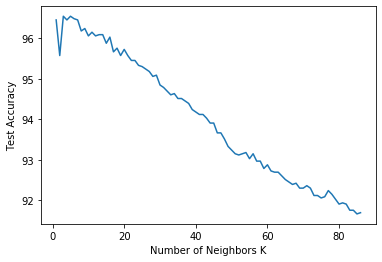

In [54]:
import matplotlib.pyplot as plt
plt.plot(list_k, list_acc)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [55]:
vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]
print("The optimal number of neighbors is", k,"with", list_acc[vi_tri])

The optimal number of neighbors is 3 with 96.54335961188599


In [56]:
# select k => ap dung model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
y_pred = knn.predict(X_test)

In [58]:
# Kiểm tra độ chính xác
print("The Train prediction accuracy is: ", 
      knn.score(X_train,y_train)*100,"%")
print("The Test prediction accuracy is: ", 
      knn.score(X_test,y_test)*100,"%")

The Train prediction accuracy is:  97.9334546399792 %
The Test prediction accuracy is:  96.54335961188599 %


In [59]:
x2 = datetime.datetime.now() 
print(x2-x1)

0:00:55.123390


 **------------------------------------------------------ End - KNN -------------------------------------------------------**

 **---------------------------------------------------- 2. DECISIONTREE CLASSIFIER  ----------------------------------------------------------**

In [60]:
x1 = datetime.datetime.now() 
print(x1)

2019-12-09 18:03:43.493725


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
clf = DecisionTreeClassifier(criterion='entropy') # nen dung Gini vi day la thuoc tinh lien tuc
tree_model = clf.fit(X_train, y_train)

In [63]:
# Kiểm tra độ chính xác
print("The Train prediction accuracy is: ", tree_model.score(X_train, y_train)*100,"%")
print("The Test prediction accuracy is: ", tree_model.score(X_test, y_test)*100,"%")

The Train prediction accuracy is:  100.0 %
The Test prediction accuracy is:  90.14554275318375 %


In [64]:
x2 = datetime.datetime.now() 
print(x2-x1)

0:00:00.101729


 **------------------------------------------------------ End - Decision Tree -------------------------------------------------------**

 **---------------------------------------------------- 3. RANDOM FOREST  ----------------------------------------------------------**

In [65]:
x1 = datetime.datetime.now() 
print(x1)

2019-12-09 18:03:43.604432


**Chọn số lượng cây n_estimators phù hợp**

In [66]:
from sklearn.ensemble import RandomForestClassifier
list_n = []
list_acc = []
for n_estimators in [10, 30, 50, 70, 100, 120, 150, 170, 200, 250, 300]:        
    list_n.append(n_estimators)
    clf = RandomForestClassifier(n_estimators = n_estimators)
    forest_model = clf.fit(X_train, y_train)
    y_pred = forest_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100 
    list_acc.append(acc)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for n_estimators:",n_estimators)
    

Accuracy is  96.48271679805943 % for n_estimators: 10
Accuracy is  97.54396604002426 % for n_estimators: 30
Accuracy is  97.1497877501516 % for n_estimators: 50
Accuracy is  98.08975136446331 % for n_estimators: 70
Accuracy is  97.6349302607641 % for n_estimators: 100
Accuracy is  97.75621588841722 % for n_estimators: 120
Accuracy is  97.6349302607641 % for n_estimators: 150
Accuracy is  98.2413583990297 % for n_estimators: 170
Accuracy is  97.90782292298363 % for n_estimators: 200
Accuracy is  97.7865372953305 % for n_estimators: 250
Accuracy is  97.87750151607034 % for n_estimators: 300


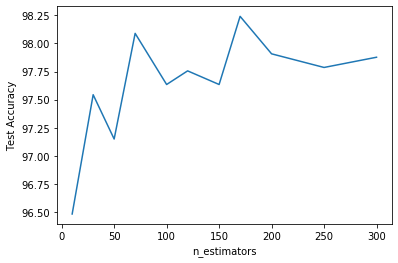

In [67]:
import matplotlib.pyplot as plt
plt.plot(list_n, list_acc)
plt.xlabel('n_estimators')
plt.ylabel('Test Accuracy')
plt.show()

In [68]:
vi_tri = list_acc.index(max(list_acc))
n = list_n[vi_tri]
print("The optimal n_estimators is", n,"with", list_acc[vi_tri])

The optimal n_estimators is 170 with 98.2413583990297


In [69]:
clf = RandomForestClassifier(n_estimators = n)
forest_model = clf.fit(X_train, y_train)

In [70]:
y_pred = forest_model.predict(X_test)

In [71]:
# Kiểm tra độ chính xác
print("The Training prediction accuracy is: ",
      forest_model.score(X_train,y_train)*100,"%")
print("The Testing prediction accuracy is: ",
      forest_model.score(X_test,y_test)*100,"%")

The Training prediction accuracy is:  100.0 %
The Testing prediction accuracy is:  97.84718010915707 %


In [72]:
x2 = datetime.datetime.now() 
print(x2-x1)

0:00:18.978285


 **------------------------------------------------------ End - Random Forest -------------------------------------------------------**

 **------------------------------------------------------ 4. SVC -------------------------------------------------------**

In [73]:
x1 = datetime.datetime.now() 
print(x1)

2019-12-09 18:04:02.593689


In [74]:
from sklearn import svm 
clf = svm.SVC(gamma=0.001, C=100) # các tham số cho mô hình hoạt động tốt hơn

In [75]:
clf.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
y_pred = clf.predict(X_test) 
y_pred

array([8, 1, 2, ..., 4, 5, 2], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score 
print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy is  88.50818677986658 %


In [78]:
# Kiểm tra độ chính xác
print("The Train prediction accuracy is: ", 
      clf.score(X_train,y_train)*100,"%")
print("The Test prediction accuracy is: ", 
      clf.score(X_test,y_test)*100,"%")

The Train prediction accuracy is:  100.0 %
The Test prediction accuracy is:  88.50818677986658 %


In [79]:
x2 = datetime.datetime.now() 
print(x2-x1)

0:00:06.304137


 **------------------------------------------------------ End - SVC -------------------------------------------------------**

**NHẬN XÉT: Trong cả 4 model thì KNN cho ra kết quả predict tốt nhất mà không bị overfitting**

**Yêu cầu 2: Hãy áp dụng thuật toán PCA và thuật toán đã chọn ở Yêu cầu 1 để thực hiện việc xác định một mẫu là loại nào (trong các loại 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) dựa trên các thông tin được cung cấp.
Nhận xét kết quả giữa việc có áp dụng PCA và không áp dụng PCA.**

Thời gian chạy của cái model:
1. KNN: 1 phút
2. Decision Tree: 0 giây
3. Random Forest: 18 giây
4. SVC: 6 giây

In [82]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
 
# Fit on training set only. 
scaler.fit(X_train)
 
# Apply transform to both the training set and the test set. 
X_train_s = scaler.transform(X_train) 
X_test_s = scaler.transform(X_test)

In [83]:
from sklearn.decomposition import PCA
# Make an instance of the Model 
pca = PCA(.95)

# Fit PCA on training set. Note: you are fitting PCA on the training set only 
pca.fit(X_train_s)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [84]:
pca.n_components_

11

In [88]:
# Apply the mapping (transform) to both the training set and the test set. 
X_train_s = pca.transform(X_train_s)
X_test_s = pca.transform(X_test_s)

In [89]:
import datetime 
x1 = datetime.datetime.now() 
print(x1)

2019-12-09 18:15:04.914240


**Tìm best K**

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
list_k = []
list_acc = []
for K_value in range(1,int(y_train.shape[0]**0.5)):        
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors = K_value)
    neigh.fit(X_train_s, y_train) 
    y_pred = neigh.predict(X_test_s)
    acc = accuracy_score(y_test,y_pred)*100 
    list_acc.append(acc)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)
    

Accuracy is  94.87568223165555 % for K-Value: 1
Accuracy is  94.72407519708914 % for K-Value: 2
Accuracy is  95.66403881140086 % for K-Value: 3
Accuracy is  95.54275318374773 % for K-Value: 4
Accuracy is  95.66403881140086 % for K-Value: 5
Accuracy is  95.66403881140086 % for K-Value: 6
Accuracy is  95.72468162522742 % for K-Value: 7
Accuracy is  95.51243177683445 % for K-Value: 8
Accuracy is  95.51243177683445 % for K-Value: 9
Accuracy is  95.6033959975743 % for K-Value: 10
Accuracy is  95.63371740448757 % for K-Value: 11
Accuracy is  95.69436021831413 % for K-Value: 12
Accuracy is  95.45178896300789 % for K-Value: 13
Accuracy is  95.42146755609461 % for K-Value: 14
Accuracy is  95.45178896300789 % for K-Value: 15
Accuracy is  95.30018192844148 % for K-Value: 16
Accuracy is  95.36082474226805 % for K-Value: 17
Accuracy is  95.39114614918132 % for K-Value: 18
Accuracy is  95.30018192844148 % for K-Value: 19
Accuracy is  95.26986052152819 % for K-Value: 20
Accuracy is  95.20921770770163

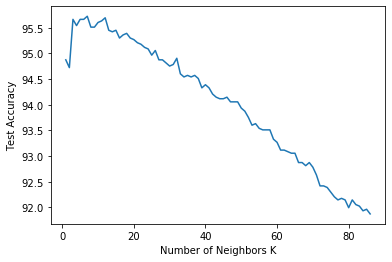

In [91]:
import matplotlib.pyplot as plt
plt.plot(list_k, list_acc)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [92]:
vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]
print("The optimal number of neighbors is", k,"with", list_acc[vi_tri])

The optimal number of neighbors is 7 with 95.72468162522742


In [93]:
# select k => ap dung model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_s, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [94]:
y_pred = knn.predict(X_test_s)

In [95]:
# Kiểm tra độ chính xác
print("The Train prediction accuracy is: ", 
      knn.score(X_train_s,y_train)*100,"%")
print("The Test prediction accuracy is: ", 
      knn.score(X_test_s,y_test)*100,"%")

The Train prediction accuracy is:  96.7507148427346 %
The Test prediction accuracy is:  95.72468162522742 %


In [96]:
x2 = datetime.datetime.now() 
print(x2-x1)

0:00:28.382324


**=> Dùng PCA đã giảm được 50% tốc độ xử lý KNN (từ 1 phút xuống còn 30s)**